In [7]:
import geopandas as gpd
import numpy as np
import json
import pandas as pd
from shapely.geometry import Point

In [19]:
import geopandas as gpd
import numpy as np
import json
import pandas as pd
from shapely.geometry import Point

def create_dataframe_with_random_points_inside_geom(
    region_dataframe: gpd.GeoDataFrame,
    n_points: int = 100,
    seed: int | None = 42
) -> pd.DataFrame:
    """

    Args:
        region_dataframe (gpd.GeoDataFrame): Geopandas Dataframe with the domain
        n_points (int, optional): Number of random points generated. Defaults to 100.
        seed (int | None, optional): Random seed. Defaults to 42.

    Returns:
        pd.DataFrame: dataframe with columns "Latitude" and "Longitude"
    """
    data = {'geometry': [region_dataframe['geometry'].unary_union]}
    gdf_union = gpd.GeoDataFrame(data, geometry='geometry')
    random_points = gdf_union.sample_points(n_points, rng=seed).explode(index_parts=False)
    coordinates = random_points.apply(lambda point: pd.Series({'Latitude': point.y, 'Longitude': point.x}))
    return pd.DataFrame(coordinates).reset_index(drop=True)

states: list[str] = ["RS","SC","PR","SP","MG","ES","RJ"]
estados_brasil: gpd.GeoDataFrame = gpd.read_file("assets/FEATURES/MALHAS/BR_UF_2022.shp")
estados_brasil = estados_brasil[estados_brasil['SIGLA_UF'].isin(states)].cx[:-42,:].reset_index()

random_points_dataframe = create_dataframe_with_random_points_inside_geom(estados_brasil, n_points=250, seed=42)

random_points_dataframe['Presence'] = 0
occurence = pd.read_parquet("assets/INPUT/occurence.parquet")

occurence_absence = pd.concat([random_points_dataframe, occurence])
occurence_absence.to_parquet("assets/INPUT/occurence_abscence.parquet")

In [20]:
random_points_dataframe

,Latitude,Longitude,Presence
0,-29.761751,-56.921177,0
1,-29.911165,-56.783255,0
2,-30.521188,-56.225433,0
3,-28.805642,-56.090195,0
4,-29.132003,-55.974053,0
...,...,...,...
245,-17.655385,-41.159893,0
246,-17.138803,-40.981107,0
247,-15.977344,-40.694886,0
248,-15.856133,-40.572557,0


In [16]:
data = {'geometry': [estados_brasil['geometry'].unary_union]}
gdf_union = gpd.GeoDataFrame(data, geometry='geometry')

In [17]:
gdf_union

,geometry
0,"MULTIPOLYGON (((-51.76538 -31.87981, -51.77089..."


In [ ]:
pts

In [ ]:
teste.set_geometry()

In [9]:
teste

,geometry


In [10]:
estados_brasil['geometry'].unary_union.union()

shapely.geometry.multipolygon.MultiPolygon

In [9]:
states: list[str] = ["RS","SC","PR","SP","MG","ES","RJ"]
estados_brasil: gpd.GeoDataFrame = gpd.read_file("assets/FEATURES/MALHAS/BR_UF_2022.shp")
estados_brasil = estados_brasil[estados_brasil['SIGLA_UF'].isin(states)].cx[:-42,:].reset_index()

random_points_dataframe = create_dataframe_with_random_points_inside_geom(estados_brasil, n_points=250, seed=42)

random_points_dataframe['Presence'] = 0
occurence = pd.read_parquet("assets/INPUT/occurence.parquet")

occurence_absence = pd.concat([random_points_dataframe, occurence])
occurence_absence.to_parquet("assets/INPUT/occurence_abscence.parquet")

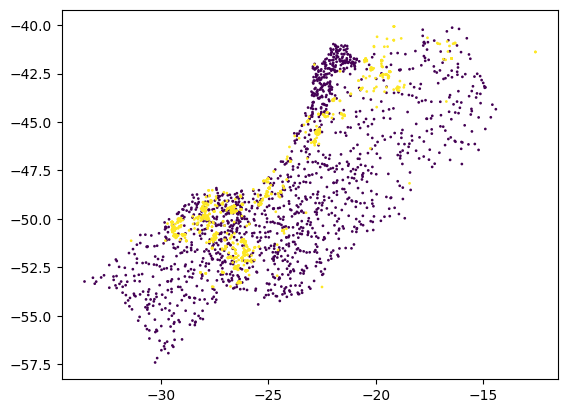

In [15]:
import matplotlib.pyplot as plt

plt.scatter(x=occurence_absence['Latitude'], y = occurence_absence['Longitude'], c = occurence_absence['Presence'], s=0.9)
plt.show()
#occurence_absence